Taxi problem solved using Q learning with visualisation of agent movements for 100 episodes

In [ ]:
!apt-get install x11-utils > /dev/null 2>&1
!pip install pyglet > /dev/null 2>&1
!apt-get install python3-pyglet > /dev/null 2>&1

In [ ]:
import gym

In [ ]:
env=gym.make('Taxi-v3').env

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
env.reset()

203

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [ ]:
!apt-get install -y xvfb
!pip install pyvirtualdisplay


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size = (400,300))
display.start()


In [ ]:
!python -m pip install pygame

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gym import envs
all_envs = envs.registry.all()
env_ids = [env_spec.id for env_spec in all_envs]
print(sorted(env_ids))

['Acrobot-v1', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'Blackjack-v1', 'CarRacing-v2', 'CartPole-v0', 'CartPole-v1', 'CliffWalking-v0', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Pusher-v2', 'Pusher-v4', 'Reacher-v2', 'Reacher-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Taxi-v3', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4']


/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:421: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(


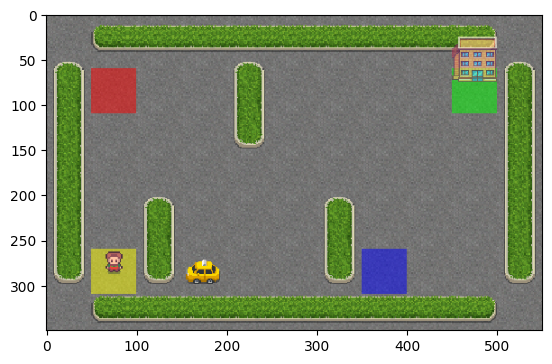

In [ ]:
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(100):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  screen = env.render(mode='rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait = True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

  ipythondisplay.clear_output(wait=True)
  env.close()

  ipythondisplay.clear_output(wait=True)
  env.close()


In [ ]:
print('Action Space {}'.format(env.action_space))
print('State Space {}'.format(env.observation_space))
state = env.encode(3,1,2,0)
print('State:', state)
env.s = state


Action Space Discrete(6)
State Space Discrete(500)
State: 328


In [ ]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [ ]:
env.s = 328
epochs = 0
penalties, reward = 0, 0
frames = []
done = False
while not done:
  action = env.action_space.sample()
  state, reward, done, info = env.step(action)

  if reward == -10:
    penalties += 1

  frames.append({
      'frame': env.render(mode='rgb_array'),
      'state': state,
      'action': action,
      'reward': reward
  })

  epochs += 1

  print('Timesteps taken:   {}'.format(epochs))
  print('Penalties incurred: {}'.format(penalties))

print('Timesteps taken: {}'.format(epochs))
print('Penalties incurred: {}'.format(penalties))


Streaming output truncated to the last 5000 lines.
Timesteps taken:   113
Penalties incurred: 34
Timesteps taken:   114
Penalties incurred: 35
Timesteps taken:   115
Penalties incurred: 35
Timesteps taken:   116
Penalties incurred: 36
Timesteps taken:   117
Penalties incurred: 37
Timesteps taken:   118
Penalties incurred: 37
Timesteps taken:   119
Penalties incurred: 37
Timesteps taken:   120
Penalties incurred: 38
Timesteps taken:   121
Penalties incurred: 39
Timesteps taken:   122
Penalties incurred: 39
Timesteps taken:   123
Penalties incurred: 39
Timesteps taken:   124
Penalties incurred: 39
Timesteps taken:   125
Penalties incurred: 39
Timesteps taken:   126
Penalties incurred: 40
Timesteps taken:   127
Penalties incurred: 40
Timesteps taken:   128
Penalties incurred: 40
Timesteps taken:   129
Penalties incurred: 41
Timesteps taken:   130
Penalties incurred: 41
Timesteps taken:   131
Penalties incurred: 41
Timesteps taken:   132
Penalties incurred: 42
Timesteps taken:   133
Penalt

In [ ]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
  for i, frame in enumerate(frames):
    clear_output(wait=True)
    print(frame['frame'])
    print(f"Timestep: {i + 1}")
    print(f"State: {frame['state']}")
    print(f"Action: {frame['action']}")
    print(f"Reward: {frame['reward']}")
    sleep(.1)

print_frames(frames)



[[[110 109 106]
  [110 109 106]
  [124 122 122]
  ...
  [108 111 109]
  [108 111 109]
  [118 119 119]]

 [[110 109 106]
  [110 109 106]
  [124 122 122]
  ...
  [108 111 109]
  [108 111 109]
  [118 119 119]]

 [[114 116 115]
  [114 116 115]
  [126 127 126]
  ...
  [112 113 111]
  [112 113 111]
  [118 117 115]]

 ...

 [[116 115 116]
  [116 115 116]
  [106 107 108]
  ...
  [113 115 114]
  [113 115 114]
  [117 114 117]]

 [[116 115 116]
  [116 115 116]
  [106 107 108]
  ...
  [113 115 114]
  [113 115 114]
  [117 114 117]]

 [[115 112 112]
  [115 112 112]
  [119 119 117]
  ...
  [123 119 118]
  [123 119 118]
  [114 114 117]]]
Timestep: 2927
State: 475
Action: 5
Reward: 20


In [ ]:

import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [ ]:
%%time
 import random
 from IPython.display import clear_output

 alpha = 0.1
 gamma = 0.6
 epilson = 0.1

 all_epochs = []
 all_penalties = []

 for i in range(1, 100001):
   state = env.reset()

   epochs, penalties, reward, = 0, 1, 0

   done = False
   while not done:
        if random.uniform(0, 1) < epilson:
           action = env.action_space.sample()
        else:
           action = np.argmax(q_table[state])

        next_state, reward, done, info = env.step(action)
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value
        if reward == -10:
         penalties += 1

        state = next_state
        epochs += 1

   if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finshed.\n")

Episode: 100000
Training finshed.

CPU times: user 1min 21s, sys: 6.45 s, total: 1min 27s
Wall time: 1min 34s


In [ ]:
q_table[328]

array([ -2.39610118,  -2.27325184,  -2.40372136,  -2.35831212,
       -10.43098995, -10.74894393])

In [ ]:
total_epochs, total_penalties = 1, 1
episodes = 100

for _ in range(episodes):
  state = env.reset()
  epochs, penalties, reward = 0, 1, 0

  done = False

  while not done:
    action = np.argmax(q_table[state])
    state, reward, done, info = env.step(action)

    if reward == -10:
      penalties += 1

      epochs +=1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episodes: {total_penalties/ episodes}")

Results after 100 episodes:
Average timesteps per episode: 0.01
Average penalties per episodes: 12.74


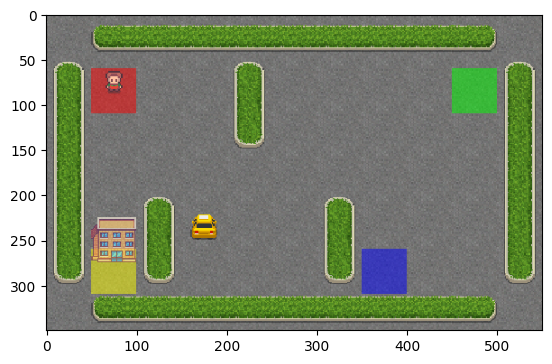

In [ ]:
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for _ in range(episodes):
  action = env.action_space.sample()
  state, penalty, done, info = env.step(action)
  screen = env.render(mode='rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

ipythondisplay.clear_output(wait=True)
env.close()

ipythondisplay.clear_output(wait=True)
env.close()